# Data Analytics Project

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('dark_background')

Read dataset aaaaaaaaaaaaaa

In [3]:
data = pd.read_csv('US_Accidents_Dec21_updated.csv')

Drop useless columns

In [ ]:
data = data.drop(columns=['Nautical_Twilight','Astronomical_Twilight','Civil_Twilight','End_Time','Number','Description'])

In [4]:
data.Start_Time = pd.to_datetime(data.Start_Time)
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
data.shape

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Drop null values

In [ ]:
data.isna().sum()

data= data.dropna()

In [ ]:
data.shape

Cleaning weather condition

In [ ]:
data.Weather_Condition.value_counts().plot(kind='pie',figsize=(20,20))

In [ ]:
data.loc[data.Weather_Condition.str.contains('Clear'),'Weather_Condition'] = 'Fair'
data.loc[data.Weather_Condition.str.contains('Sleet'),'Weather_Condition'] = 'Hail'
data.loc[data.Weather_Condition.str.contains('Ice Pellets'),'Weather_Condition'] = 'Hail'
data.loc[data.Weather_Condition.str.contains('Sand'),'Weather_Condition'] = 'Dusty'
data.loc[data.Weather_Condition.str.contains('Dust'),'Weather_Condition'] = 'Dusty'
data.loc[data.Weather_Condition.str.contains('Drizzle'),'Weather_Condition'] = 'Rain'
data.loc[data.Weather_Condition.str.contains('T-Storm'),'Weather_Condition'] = 'Thunderstorms'
data.loc[data.Weather_Condition.str.contains('Thunder'),'Weather_Condition'] = 'Thunderstorms'
data.loc[data.Weather_Condition.str.contains('Fog'),'Weather_Condition'] = 'Fog'
data.loc[data.Weather_Condition.str.contains('Cloud'),'Weather_Condition'] = 'Cloudy'
data.loc[data.Weather_Condition.str.contains('Rain'),'Weather_Condition'] = 'Rain'
data.loc[data.Weather_Condition.str.contains('Snow'),'Weather_Condition'] = 'Snow'
data.loc[data.Weather_Condition.str.contains('Windy'),'Weather_Condition'] = 'Windy'

In [ ]:
data.Weather_Condition.value_counts().plot(kind='pie',figsize=(20,20))

In [ ]:
data=data[(data.Weather_Condition == 'Fair') | (data.Weather_Condition == 'Mostly Cloudy') | (data.Weather_Condition == 'Cloudy') | (data.Weather_Condition == 'Partly Cloudy') | (data.Weather_Condition == 'Clear') | 
(data.Weather_Condition == 'Light Rain') | (data.Weather_Condition == 'Overcast') | (data.Weather_Condition == 'Scattered Clouds') | (data.Weather_Condition == 'Light Snow') | (data.Weather_Condition == 'Fog') | 
(data.Weather_Condition == 'Haze') | (data.Weather_Condition == 'Rain') | (data.Weather_Condition == 'Fair/Windy')]#.value_counts().plot(kind='pie',figsize=(15,15))

In [ ]:
data.Weather_Condition.value_counts().plot(kind='pie',figsize=(20,20))

In [ ]:
data.Start_Time.dt.time

In [ ]:
data.describe()

How many accidents per state

In [ ]:
data.State.value_counts().plot(kind='pie', figsize=(15,15))

How severe are the accidents

In [ ]:
data.Severity.value_counts().plot(kind='pie',figsize=(6,6))

Map of the accidents

In [ ]:
sample_df = data.sample(int(0.1 * len(data)))

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [4]:
data.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.089207,0.114063,0.089209,0.114064,0.092140,-0.000689,-0.045335,-0.097459,0.037802,...,0.008141,0.045928,-0.002359,-0.001747,-0.000773,-0.018017,-0.002536,-0.003009,-0.012798,NaN
Start_Lat,0.089207,1.000000,-0.154965,0.999995,-0.154962,0.071588,0.101281,-0.475065,-0.505567,0.005876,...,0.007851,0.043628,-0.017348,0.003184,-0.003366,-0.107697,0.010817,-0.003164,-0.058208,NaN
Start_Lng,0.114063,-0.154965,1.000000,-0.154956,0.999999,0.039861,-0.170566,0.032159,0.010849,0.170909,...,0.018110,-0.017202,0.006220,-0.015450,0.000450,0.038533,-0.040265,-0.007750,0.059568,NaN
End_Lat,0.089209,0.999995,-0.154956,1.000000,-0.154953,0.071593,0.101270,-0.475058,-0.505561,0.005869,...,0.007840,0.043621,-0.017347,0.003184,-0.003366,-0.107696,0.010827,-0.003163,-0.058210,NaN
End_Lng,0.114064,-0.154962,0.999999,-0.154953,1.000000,0.039830,-0.170563,0.032163,0.010852,0.170904,...,0.018110,-0.017199,0.006220,-0.015449,0.000450,0.038533,-0.040264,-0.007750,0.059566,NaN
Distance(mi),0.092140,0.071588,0.039861,0.071593,0.039830,1.000000,0.067331,-0.051212,-0.060094,0.026860,...,-0.006655,0.022442,-0.010184,-0.021462,-0.002491,-0.052826,-0.027108,-0.007322,-0.105722,NaN
Number,-0.000689,0.101281,-0.170566,0.101270,-0.170563,0.067331,1.000000,-0.051146,-0.049400,0.015825,...,-0.003792,-0.010801,-0.005052,-0.013668,-0.001360,-0.028485,-0.003688,-0.005075,-0.058870,NaN
Temperature(F),-0.045335,-0.475065,0.032159,-0.475058,0.032163,-0.051212,-0.051146,1.000000,0.993857,-0.366527,...,-0.005524,-0.020358,0.011610,0.003108,0.002122,0.061248,0.000021,0.005672,0.047657,NaN
Wind_Chill(F),-0.097459,-0.505567,0.010849,-0.505561,0.010852,-0.060094,-0.049400,0.993857,1.000000,-0.346028,...,-0.007584,-0.048784,0.012066,0.005062,0.002466,0.069379,0.005424,0.007140,0.048321,NaN
Humidity(%),0.037802,0.005876,0.170909,0.005869,0.170904,0.026860,0.015825,-0.366527,-0.346028,1.000000,...,0.000063,0.006394,-0.007099,-0.000309,0.000904,-0.000095,-0.015631,-0.005727,-0.034133,NaN


correlation

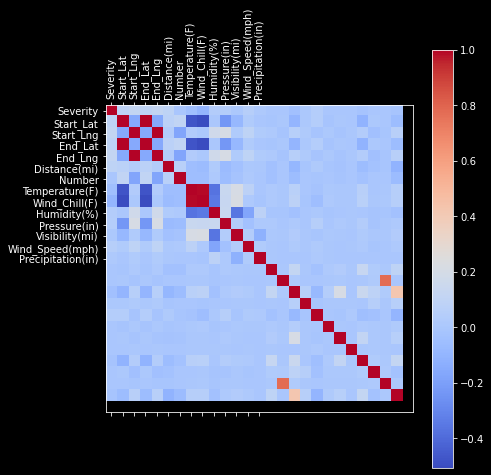

In [3]:

fig, ax = plt.subplots(1,1, figsize=(7,7))
sm = ax.matshow(data.corr(), cmap='coolwarm')

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, rotation=90, ha='center')
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('corrmap.png', dpi=300)
plt.show()

In [5]:
data.cov()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,0.229174,0.229063,1.000235,0.229070,1.000234,0.068826,-6.203898e+00,-0.403845,-0.846589,0.413599,...,1.912456e-04,0.006657,-4.383730e-05,-7.429017e-05,-2.432501e-06,-1.317303e-03,-0.000160,-3.532878e-05,-0.001781,0.0
Start_Lat,0.229063,28.770323,-15.225765,28.770592,-15.225336,0.599151,1.072744e+04,-47.654661,-58.010304,0.723923,...,2.066538e-03,0.070853,-3.612145e-03,1.517057e-03,-1.186908e-04,-8.822602e-02,0.007654,-4.161436e-04,-0.090777,0.0
Start_Lng,1.000235,-15.225765,335.542497,-15.225107,335.538790,1.139312,-5.628492e+04,10.960688,4.204314,71.552318,...,1.627866e-02,-0.095406,4.423080e-03,-2.513949e-02,5.419334e-05,1.078030e-01,-0.097291,-3.481235e-03,0.317253,0.0
End_Lat,0.229070,28.770592,-15.225107,28.771133,-15.224709,0.599201,1.072628e+04,-47.654677,-58.010616,0.723082,...,2.063620e-03,0.070842,-3.611900e-03,1.517245e-03,-1.187030e-04,-8.822623e-02,0.007661,-4.160482e-04,-0.090781,0.0
End_Lng,1.000234,-15.225336,335.538790,-15.224709,335.535658,1.138440,-5.628332e+04,10.961800,4.205581,71.549488,...,1.627870e-02,-0.095388,4.422798e-03,-2.513821e-02,5.418081e-05,1.077998e-01,-0.097287,-3.481115e-03,0.317238,0.0
Distance(mi),0.068826,0.599151,1.139312,0.599201,1.138440,2.434726,1.221829e+03,-1.478845,-1.963825,0.952517,...,-5.095283e-04,0.010603,-6.168336e-04,-2.974685e-03,-2.555103e-05,-1.258906e-02,-0.005579,-2.801624e-04,-0.047964,0.0
Number,-6.203898,10727.442189,-56284.922232,10726.282683,-56283.320724,1221.828986,3.370931e+08,-17224.679238,-18505.821666,6472.655455,...,-3.271504e+00,-15.187101,-4.541494e+00,-2.653428e+01,-2.114944e-01,-1.125941e+02,-12.571477,-2.856567e+00,-377.693195,0.0
Temperature(F),-0.403845,-47.654661,10.960688,-47.654677,10.961800,-1.478845,-1.722468e+04,346.802325,399.638012,-156.139804,...,-5.037308e-03,-0.114745,8.439601e-03,5.119624e-03,2.608293e-04,1.748693e-01,0.000052,2.597099e-03,0.258953,0.0
Wind_Chill(F),-0.846589,-58.010304,4.204314,-58.010616,4.205581,-1.963825,-1.850582e+04,399.638012,447.786543,-167.089455,...,-7.795880e-03,-0.289126,1.005632e-02,9.553674e-03,3.567105e-04,2.329096e-01,0.015729,3.865387e-03,0.300650,0.0
Humidity(%),0.413599,0.723923,71.552318,0.723082,71.549488,0.952517,6.472655e+03,-156.139804,-167.089455,523.245866,...,7.050358e-05,0.044273,-6.337633e-03,-6.253252e-04,1.366328e-04,-3.323726e-04,-0.047161,-3.221162e-03,-0.227809,0.0


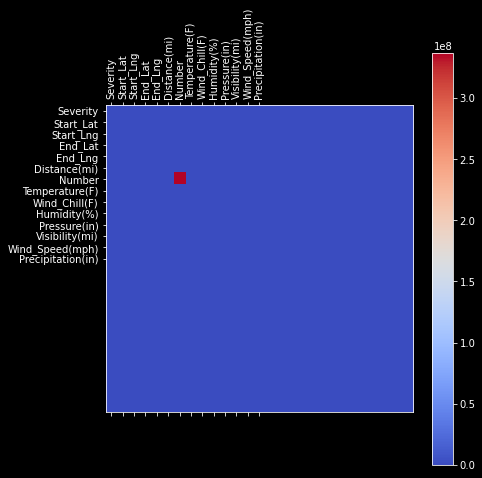

In [6]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sm = ax.matshow(data.cov(), cmap='coolwarm')

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, rotation=90, ha='center')
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('covmap.png', dpi=300)
plt.show()

In [12]:
subset = data.iloc[0:500000,:]

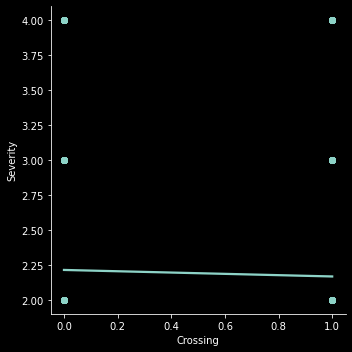

In [15]:
#sns.pairplot(data=subset[['Severity', 'Crossing', 'Precipitation(in)', 'Distance(mi)', 'Stop']], hue="Severity")
sns.lmplot(x="Crossing", y="Severity", data=subset, )